In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
car=pd.read_csv('Data.csv')
car.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [3]:
print('Rows     :',car.shape[0])
print('Columns  :',car.shape[1])
print('\nFeatures :\n     :',car.columns.tolist())
#print('\nMissing values    :',car.isnull().values.sum())
print('\nUnique values :  \n',car.nunique())

Rows     : 205
Columns  : 26

Features :
     : ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Unique values :  
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              2

In [5]:
car.shape

(205, 26)

In [9]:
a = car[car['normalized-losses'] != '?']
b = (a['normalized-losses'].astype(int)).mean()
car['normalized-losses'] = car['normalized-losses'].replace('?', b).astype(int)

In [10]:
car

symboling  normalized-losses         make fuel-type aspiration  \
0            3                122  alfa-romero       gas        std   
1            3                122  alfa-romero       gas        std   
2            1                122  alfa-romero       gas        std   
3            2                164         audi       gas        std   
4            2                164         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1                 95        volvo       gas        std   
201         -1                 95        volvo       gas      turbo   
202         -1                 95        volvo       gas        std   
203         -1                 95        volvo    diesel      turbo   
204         -1                 95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19     3.4              10.0        102   
4            136         mpfi  3.19     3.4               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01     3.4              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [11]:
a = car[car['body-style'] == 'sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

In [12]:
a = car['num-of-doors'].map({'two':2, 'four':4, '?':4})
car['num-of-doors'] = a

In [13]:
#Cleaning Price
a=car[car['price']!='?']
b=(a['price'].astype(int)).mean()
car['price']=car['price'].replace('?',b).astype(int)

In [14]:
#Cleaning horsepower
a=car[car['horsepower']!='?']
b=(a['horsepower'].astype(int)).mean()
car['horsepower']=car['horsepower'].replace('?',b).astype(int)

In [15]:
#Cleaning bore
a=car[car['bore']!='?']
b=(a['bore'].astype(float)).mean()
car['bore']=car['bore'].replace('?',b).astype(float)

In [18]:
#Cleaning the stroke 
a=car[car['stroke']!='?']
b=(a['stroke'].astype(float)).mean()
car['stroke']=car['stroke'].replace('?',b).astype(float)

In [17]:
#Cleaning peak RPM
a=car[car['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
car['peak-rpm']=car['peak-rpm'].replace('?',b).astype(float)

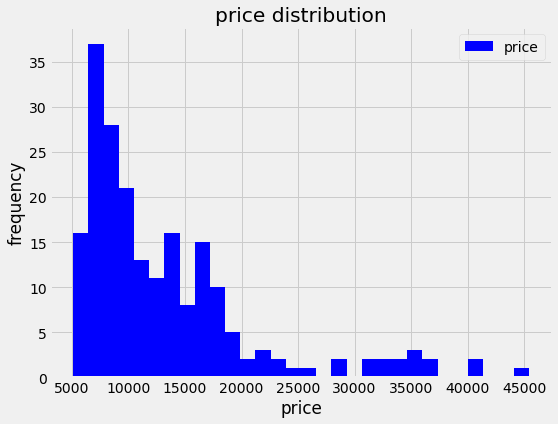

In [20]:
# Plotting a histogram of our feature price
plt.figure(figsize=(8,6)) # creating the figure
plt.hist(car['price'] # plotting the histogram
         ,bins=30 # defyning number of bars
         ,label='price' # add legend
        ,color='blue') # defyning the color

plt.xlabel('price') # add xlabel
plt.ylabel('frequency') # add ylabel
plt.legend()
plt.title('price distribution');


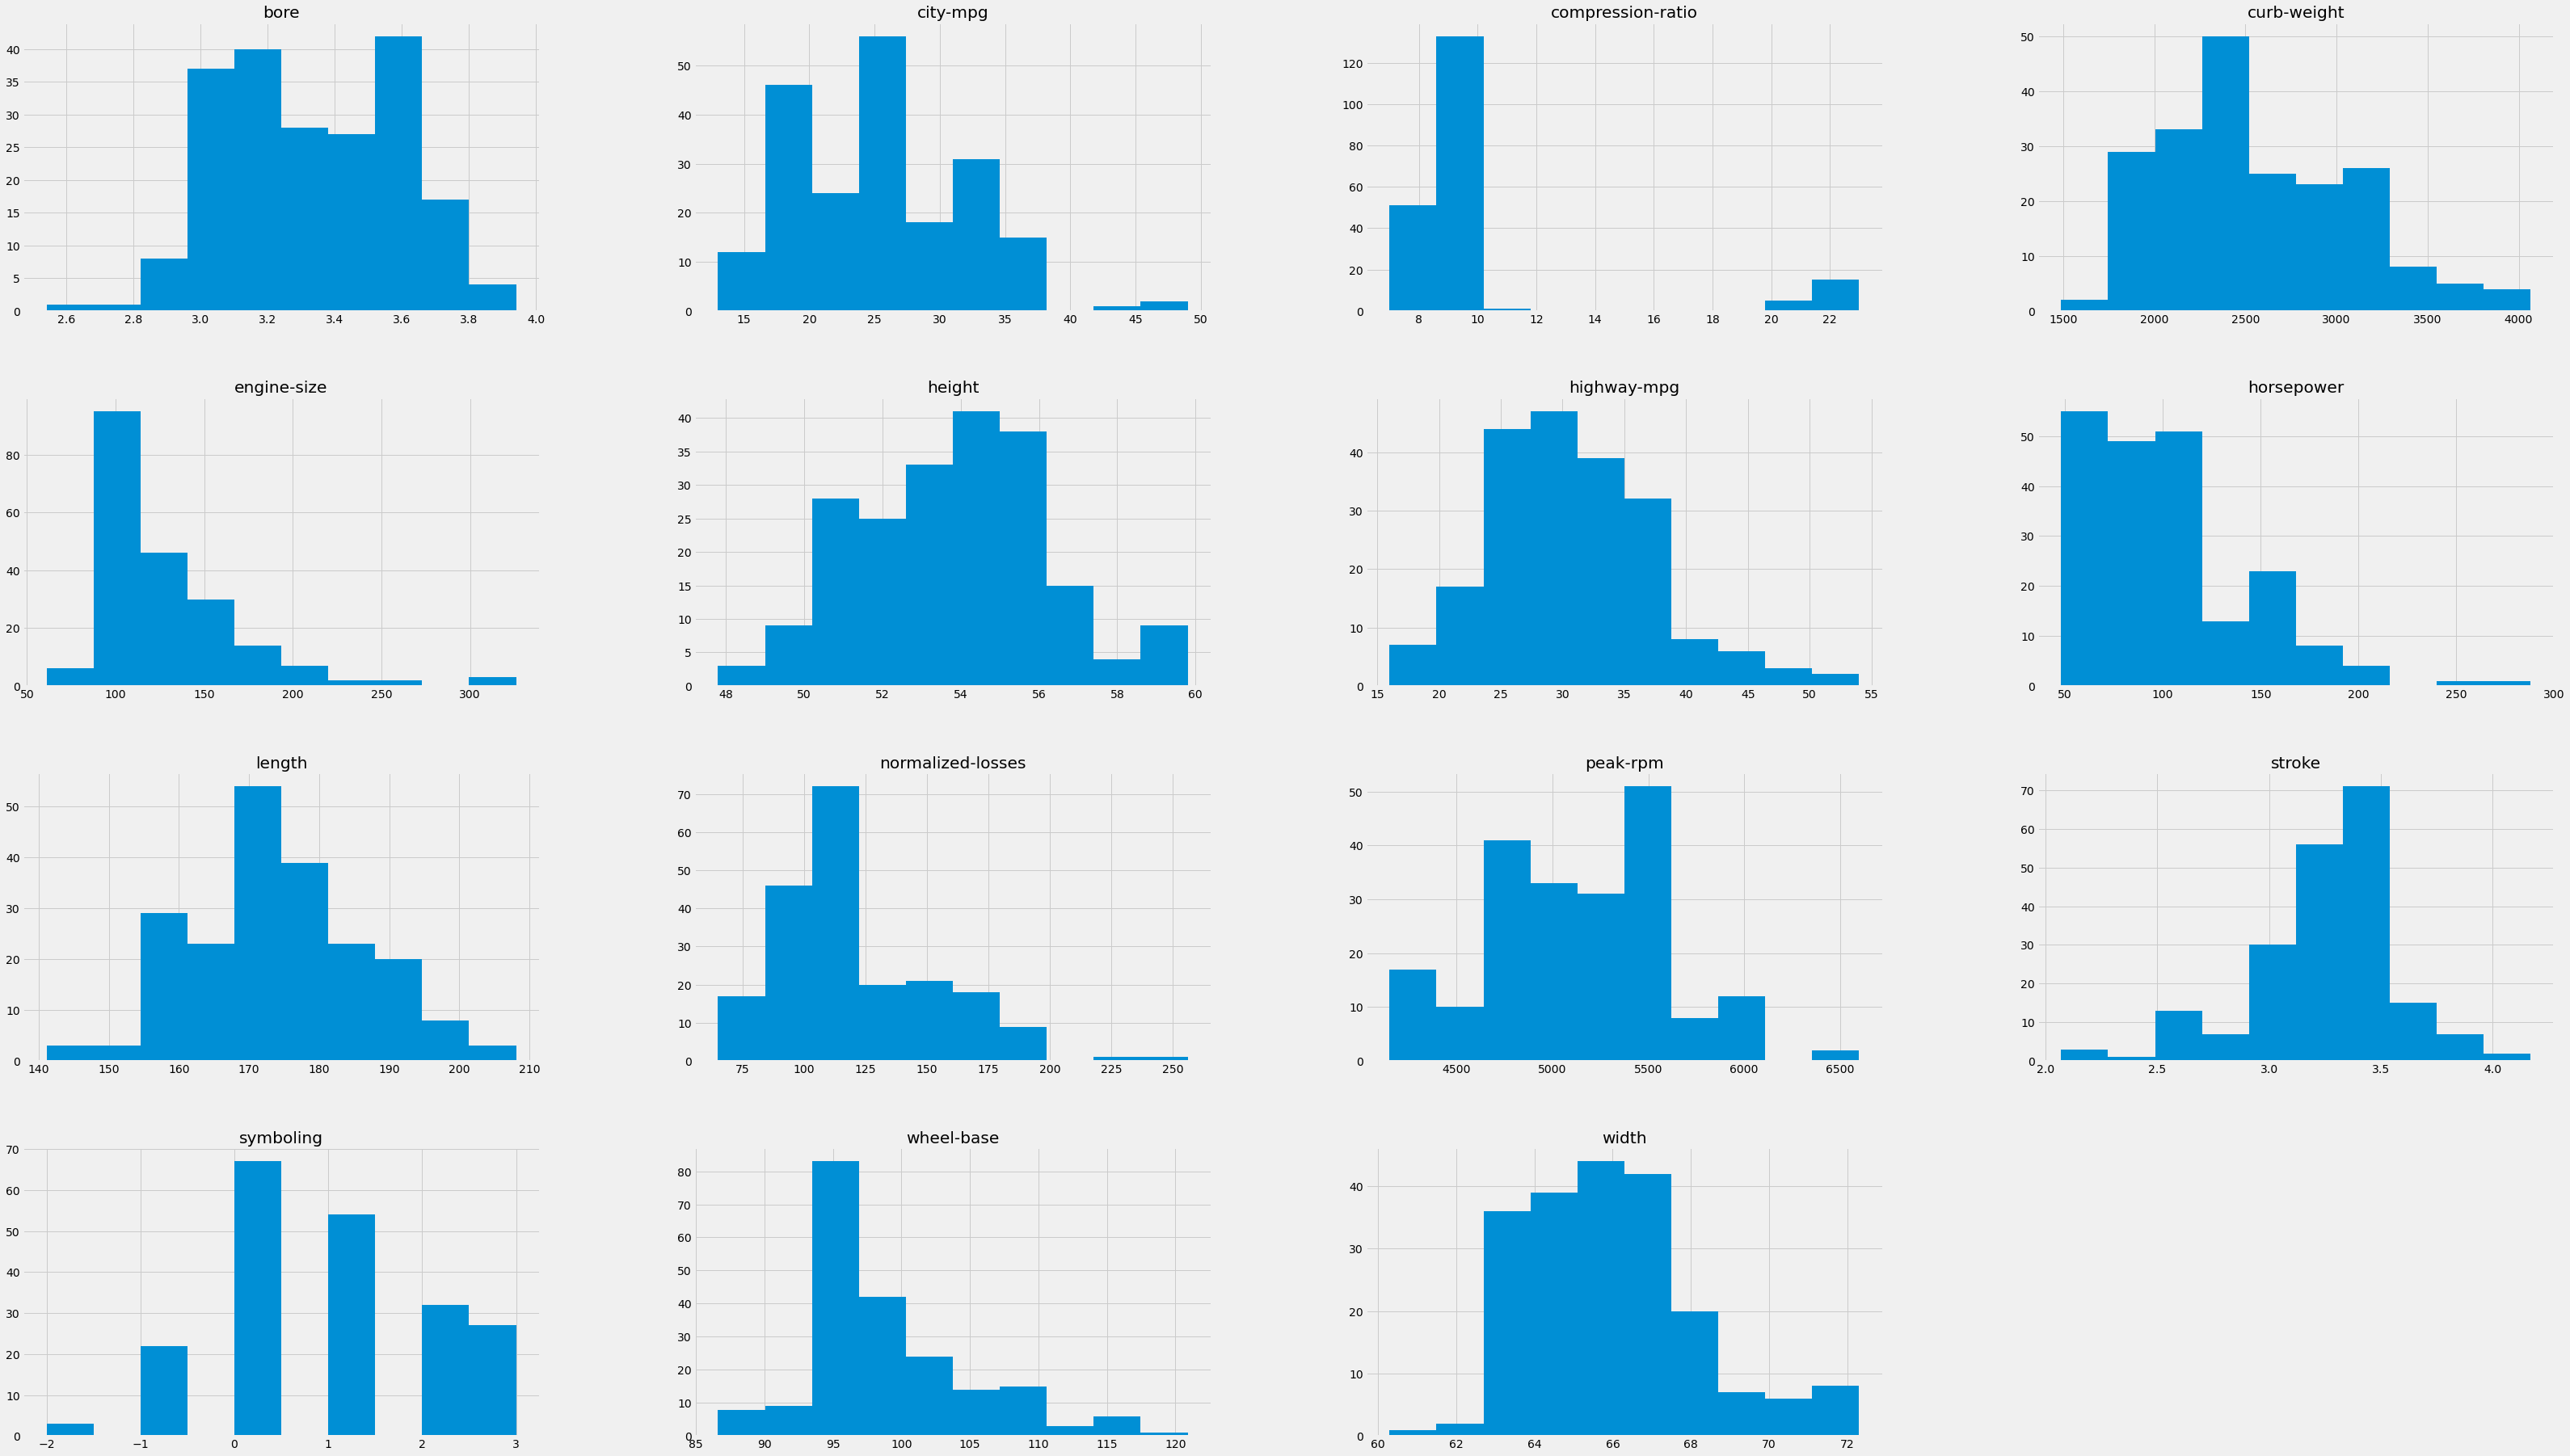

In [26]:
# Saving numerical features
num_var = ['symboling','normalized-losses','wheel-base','length'
          ,'width','height','curb-weight','engine-size','bore'
           ,'stroke','compression-ratio','horsepower','peak-rpm'
           ,'city-mpg','highway-mpg']

# plotting a histogram for each feature
car[num_var].hist(bins=10, figsize=(50,30), layout=(4,4));

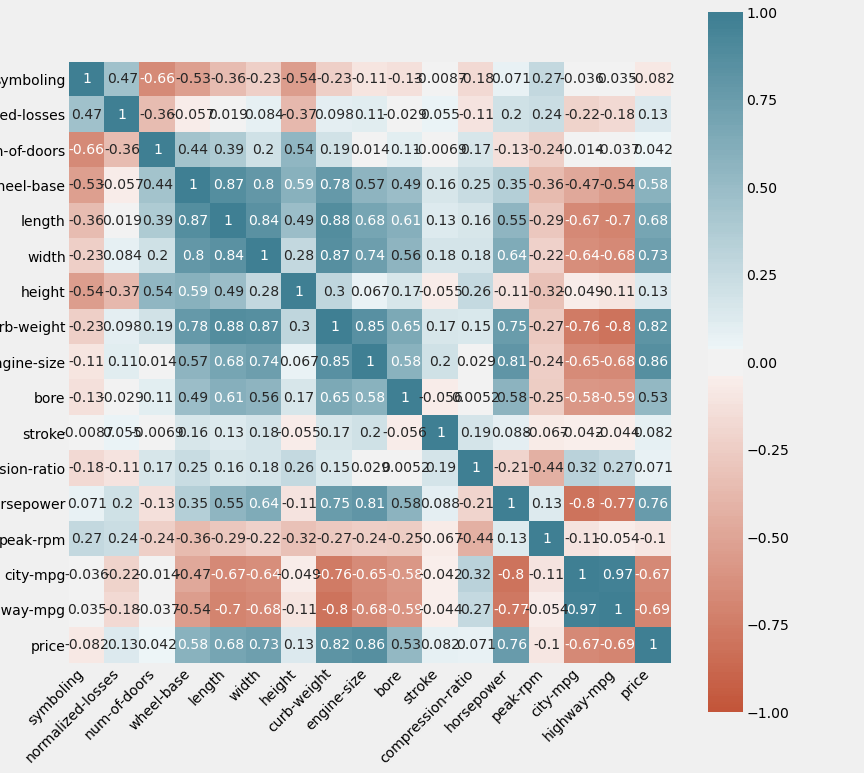

In [28]:
corr = car.corr() # creting the correlation matrix

plt.figure(figsize=(12,12)) # creating the and difyning figure size
ax = sns.heatmap( # plotting correlation matrix
    corr,vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

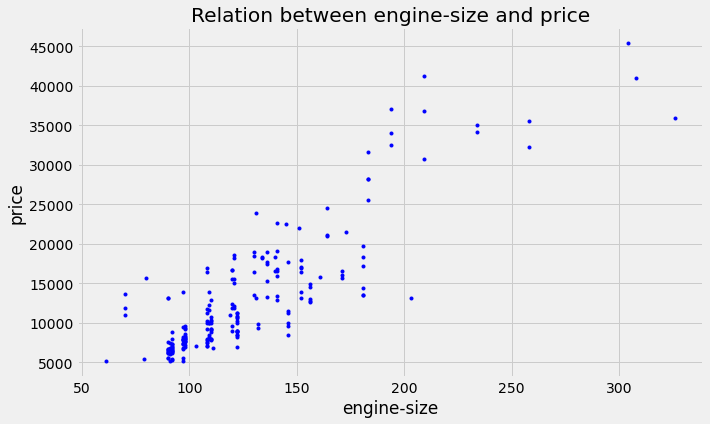

In [30]:
# Plotting a scatter plot of relation between engine_size and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['engine-size'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('engine-size') # add xlabel
plt.ylabel('price') # add ylabel
plt.title('Relation between engine-size and price');

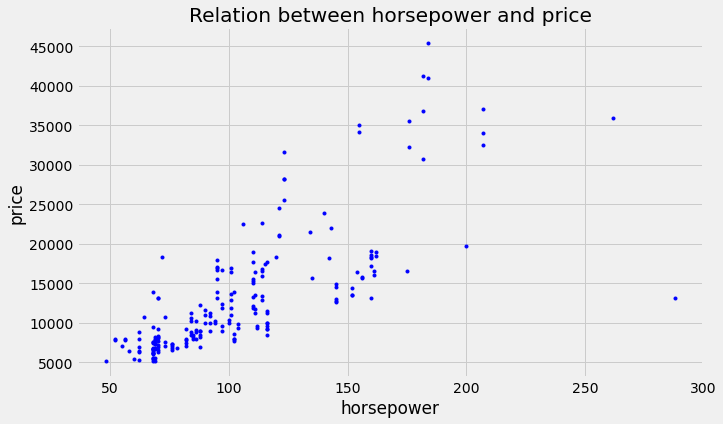

In [31]:
# Plotting a scatter plot of relation between horsepower and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['horsepower'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('horsepower') # add xlabel
plt.ylabel('price') # add ylabel
plt.title('Relation between horsepower and price');

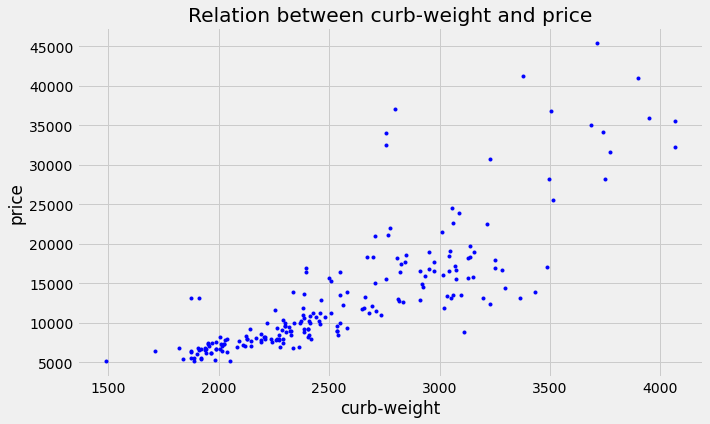

In [32]:
# Plotting a scatter plot of relation between curb_weight and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['curb-weight'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('curb-weight')
plt.ylabel('price')
plt.title('Relation between curb-weight and price');

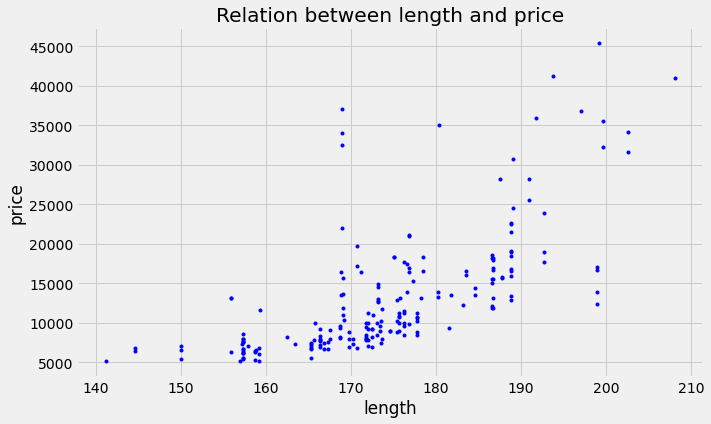

In [33]:
# Plotting a scatter plot of relation between length and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['length'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('length')
plt.ylabel('price')
plt.title('Relation between length and price');

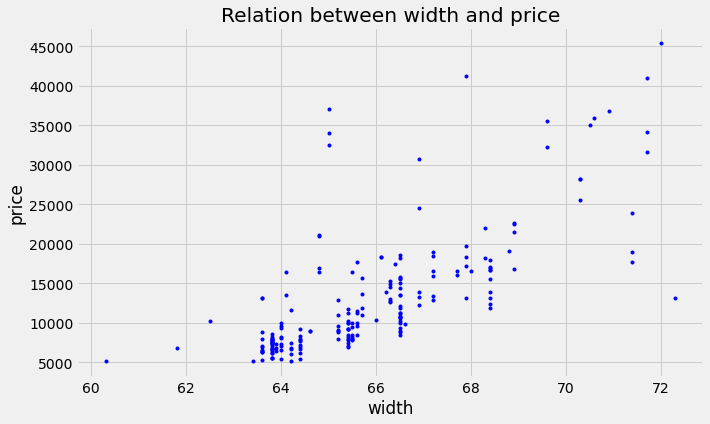

In [34]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['width'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('width')
plt.ylabel('price')
plt.title('Relation between width and price');

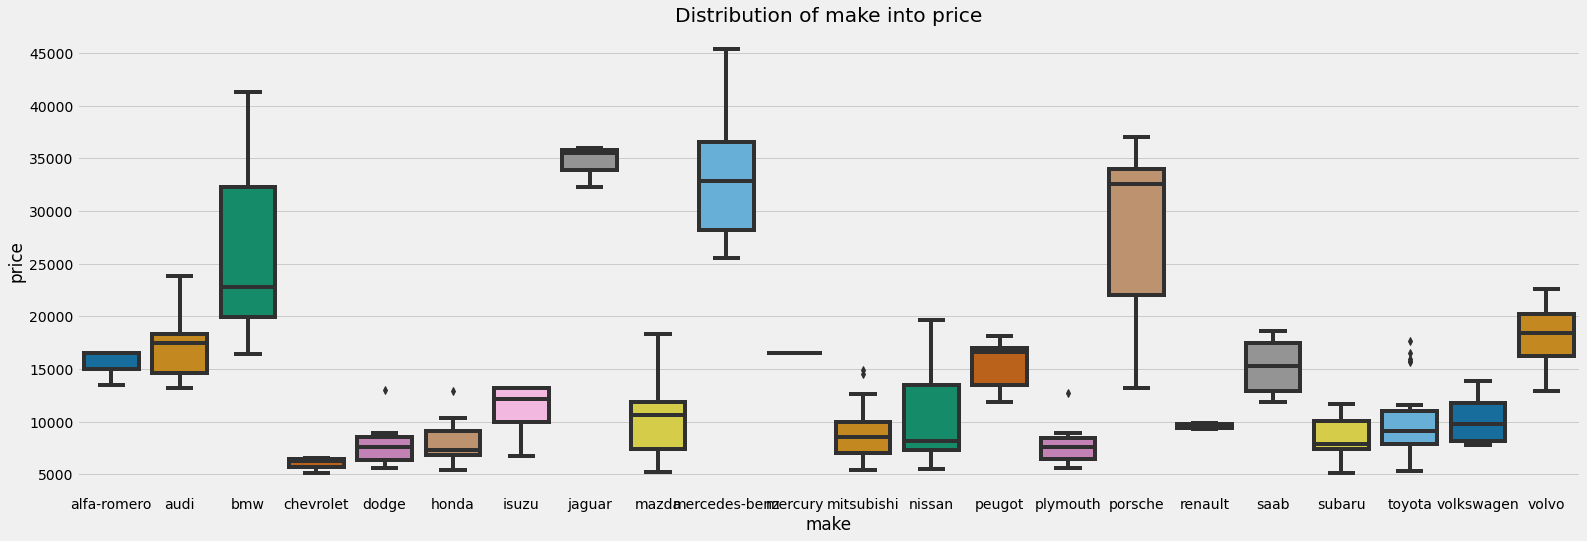

In [36]:
# Plotting Distribution of maker into price
plt.figure(figsize=(24,8))
sns.boxplot(x='make',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of make into price');

In [41]:
for i in num_var:
    # taking quantiles
    Q1 = car[i].quantile(0.25)
    Q3 = car[i].quantile(0.75)
    IQR = Q3 - Q1 # calculating IQR
    car[i] = np.where(car[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),car[i]) # removing outlayers
    car[i] = np.where(car[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),car[i]) # removing outlayers

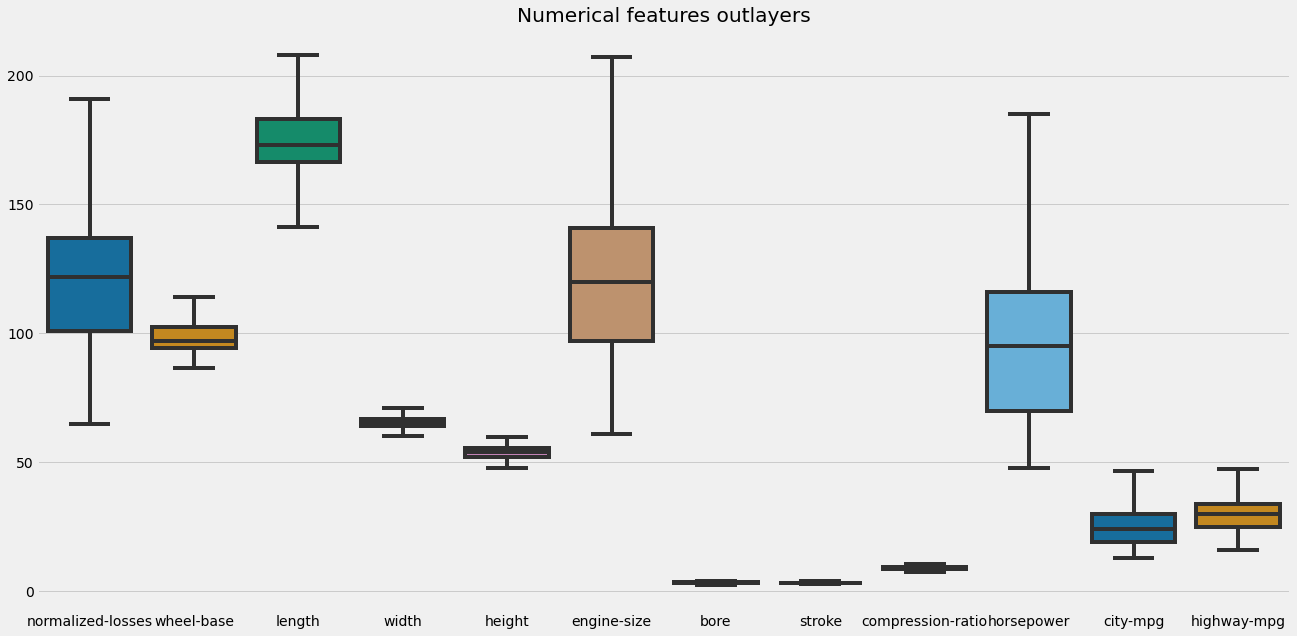

In [42]:
# Plotting boxplots to numeric features
num_var = ['normalized-losses','wheel-base','length'
          ,'width','height','engine-size','bore'
           ,'stroke','compression-ratio','horsepower'
           ,'city-mpg','highway-mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=car[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

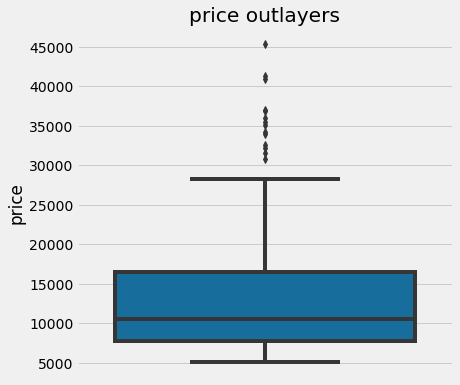

In [44]:
# Plotting a boxplot of our target to visualize outlayers
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=car, 
                 palette="colorblind")
plt.title('price outlayers');

In [45]:
# Replace outlayers using boxplot method
Q1 = car['price'].quantile(0.25) # taking Q1
Q3 = car['price'].quantile(0.75) # taking Q3
IQR = Q3 - Q1 # calculating IQR
car['price'] = np.where(car['price']>(Q3+1.5*IQR),(Q3+1.5*IQR),car['price']) # removing outlayers
car['price'] = np.where(car['price']<(Q1-1.5*IQR),(Q1-1.5*IQR),car['price']) # removing outlayers

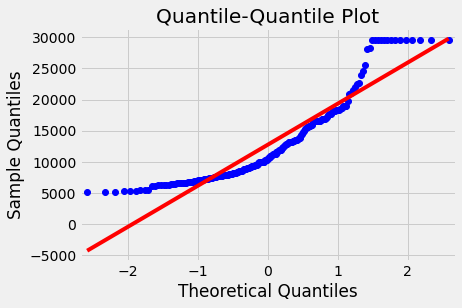

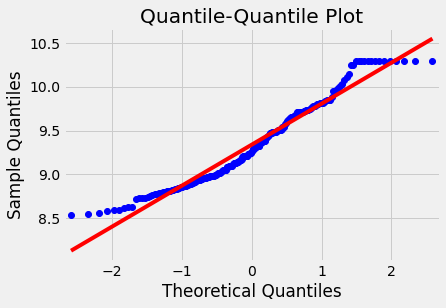

In [50]:
from statsmodels.graphics.gofplots import qqplot
# Quantile-Quantile Plot to virify normal distributions
qqplot(car['price'], line='s')
plt.title('Quantile-Quantile Plot')
plt.show()
# Log-transformation of the target variable
car['price'] = np.log1p(car['price'])

# Quantile-Quantile Plot to virify normal distributions
qqplot(car['price'], line='s')
plt.title('Quantile-Quantile Plot')
plt.show()

In [52]:
# Converting num_of_cylinders into a continuos variable
car['num-of-cylinders'][car['num-of-cylinders']=='two'] = 2
car['num-of-cylinders'][car['num-of-cylinders']=='three'] = 3
car['num-of-cylinders'][car['num-of-cylinders']=='four'] = 4
car['num-of-cylinders'][car['num-of-cylinders']=='five'] = 5
car['num-of-cylinders'][car['num-of-cylinders']=='six'] = 6
car['num-of-cylinders'][car['num-of-cylinders']=='eight'] = 8
car['num-of-cylinders'][car['num-of-cylinders']=='twelve'] = 12

# converting into integer
car['num-of-cylinders'] = car['num-of-cylinders'].astype('int64')

In [54]:
# taking numerical features to log trasformation
num_var = ['normalized-losses','wheel-base','length'
          ,'width','height','curb-weight','engine-size','bore'
           ,'stroke','compression-ratio','horsepower','peak-rpm'
           ,'city-mpg','highway-mpg','num-of-cylinders']

car[num_var] = np.log1p(car[num_var]) # log transformation

In [56]:
# Converting engine_location into binary
car['engine-location'] = np.where(car['engine-location']=='front',2,1)
# Cnverting fuel_type into binary
car['fuel-type'] = np.where(car['fuel-type']=='gas',2,1)
# Cnverting aspiration into binary
car['aspiration'] = np.where(car['aspiration']=='std',2,1)
# Cnverting num_of_doors into binary
car['num-of-doors'] = np.where(car['num-of-doors']=='two',2,1)

In [57]:
# converting maker to continuos based on boxplots
car['make'][car['make']=='chevrolet'] = 1
car['make'][car['make']=='renault'] = 2
car['make'][car['make']=='isuzu'] = 3
car['make'][car['make']=='subaru'] = 4
car['make'][car['make']=='plymouth'] = 5
car['make'][car['make']=='dodge'] = 6
car['make'][car['make']=='honda'] = 7
car['make'][car['make']=='volkswagen'] = 8
car['make'][car['make']=='mitsubishi'] = 9
car['make'][car['make']=='alfa-romero'] = 10
car['make'][car['make']=='mercury'] = 11
car['make'][car['make']=='toyota'] = 12
car['make'][car['make']=='peugot'] = 13
car['make'][car['make']=='mazda'] = 14
car['make'][car['make']=='saab'] = 15
car['make'][car['make']=='nissan'] = 16
car['make'][car['make']=='volvo'] = 17
car['make'][car['make']=='audi'] = 18
car['make'][car['make']=='jaguar'] = 19
car['make'][car['make']=='porsche'] = 20
car['make'][car['make']=='bmw'] = 21
car['make'][car['make']=='mercedes-benz'] = 22
car['make']=car['make'].astype('int64')

In [58]:
#converting fuel_system to continuos based on boxplots
car['fuel-system'][car['fuel-system']=='1bbl'] = 1
car['fuel-system'][car['fuel-system']=='spfi'] = 2
car['fuel-system'][car['fuel-system']=='2bbl'] = 3
car['fuel-system'][car['fuel-system']=='mfi'] = 4
car['fuel-system'][car['fuel-system']=='4bbl'] = 5
car['fuel-system'][car['fuel-system']=='spdi'] = 6
car['fuel-system'][car['fuel-system']=='idi'] = 7
car['fuel-system'][car['fuel-system']=='mpfi'] = 8
car['fuel-system']=car['fuel-system'].astype('int64')

# converting engine_type to continuos based on boxplots
car['engine-type'][car['engine-type']=='rotor'] = 1
car['engine-type'][car['engine-type']=='l'] = 2
car['engine-type'][car['engine-type']=='dohcv'] = 3
car['engine-type'][car['engine-type']=='dohc'] = 4
car['engine-type'][car['engine-type']=='ohcf'] = 5
car['engine-type'][car['engine-type']=='ohc'] = 6
car['engine-type'][car['engine-type']=='ohcv'] = 7
car['engine-type']=car['engine-type'].astype('int64')

# converting body_style to continuos based on boxplots
car['body-style'][car['body-style']=='hatchback'] = 1
car['body-style'][car['body-style']=='wagon'] = 2
car['body-style'][car['body-style']=='convertible'] = 4
car['body-style'][car['body-style']=='sedan'] = 3
car['body-style'][car['body-style']=='hardtop'] = 5
car['body-style']=car['body-style'].astype('int64')
# converting drive_whels to continuos based on boxplots
car['drive-wheels'][car['drive-wheels']=='4wd'] = 1
car['drive-wheels'][car['drive-wheels']=='fwd'] = 2
car['drive-wheels'][car['drive-wheels']=='rwd'] = 3
car['drive-wheels']=car['drive-wheels'].astype('int64')

In [60]:
cars = car
# relation between length and width
cars['len_wid'] = cars['length']/cars['width']

# relation between wheel_base and curb_weight
cars['whb_c_wght'] = cars['wheel-base']/cars['curb-weight']

# relation between horsepower and engine_size
cars['hpw_eng_size'] = cars['horsepower']/cars['engine-size']

# relation between highway_mpg and city_mpg
cars['hway_cit_mpg'] = cars['highway-mpg']/cars['city-mpg']

In [61]:
# creating a feature to represent the mean mpg
cars['mean_mpg'] = (cars['highway-mpg']+cars['city-mpg'])/2

# creating a feature to represent the horsepower per cylinders
cars['hpw_cylinders'] = cars['horsepower']/cars['num-of-cylinders']

# creating a feature to represent the mean mpg per horsepower
cars['mean_mpg_hpw'] = cars['mean_mpg']/cars['horsepower']

In [62]:
# taking numerical features to log trasformation
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg'
          ,'make','drive-wheels','body-style','engine-type','fuel-system'
          ,'engine-location','fuel-type','aspiration','num-of-doors']

cars[num_var] = np.log1p(cars[num_var]) # log transformation

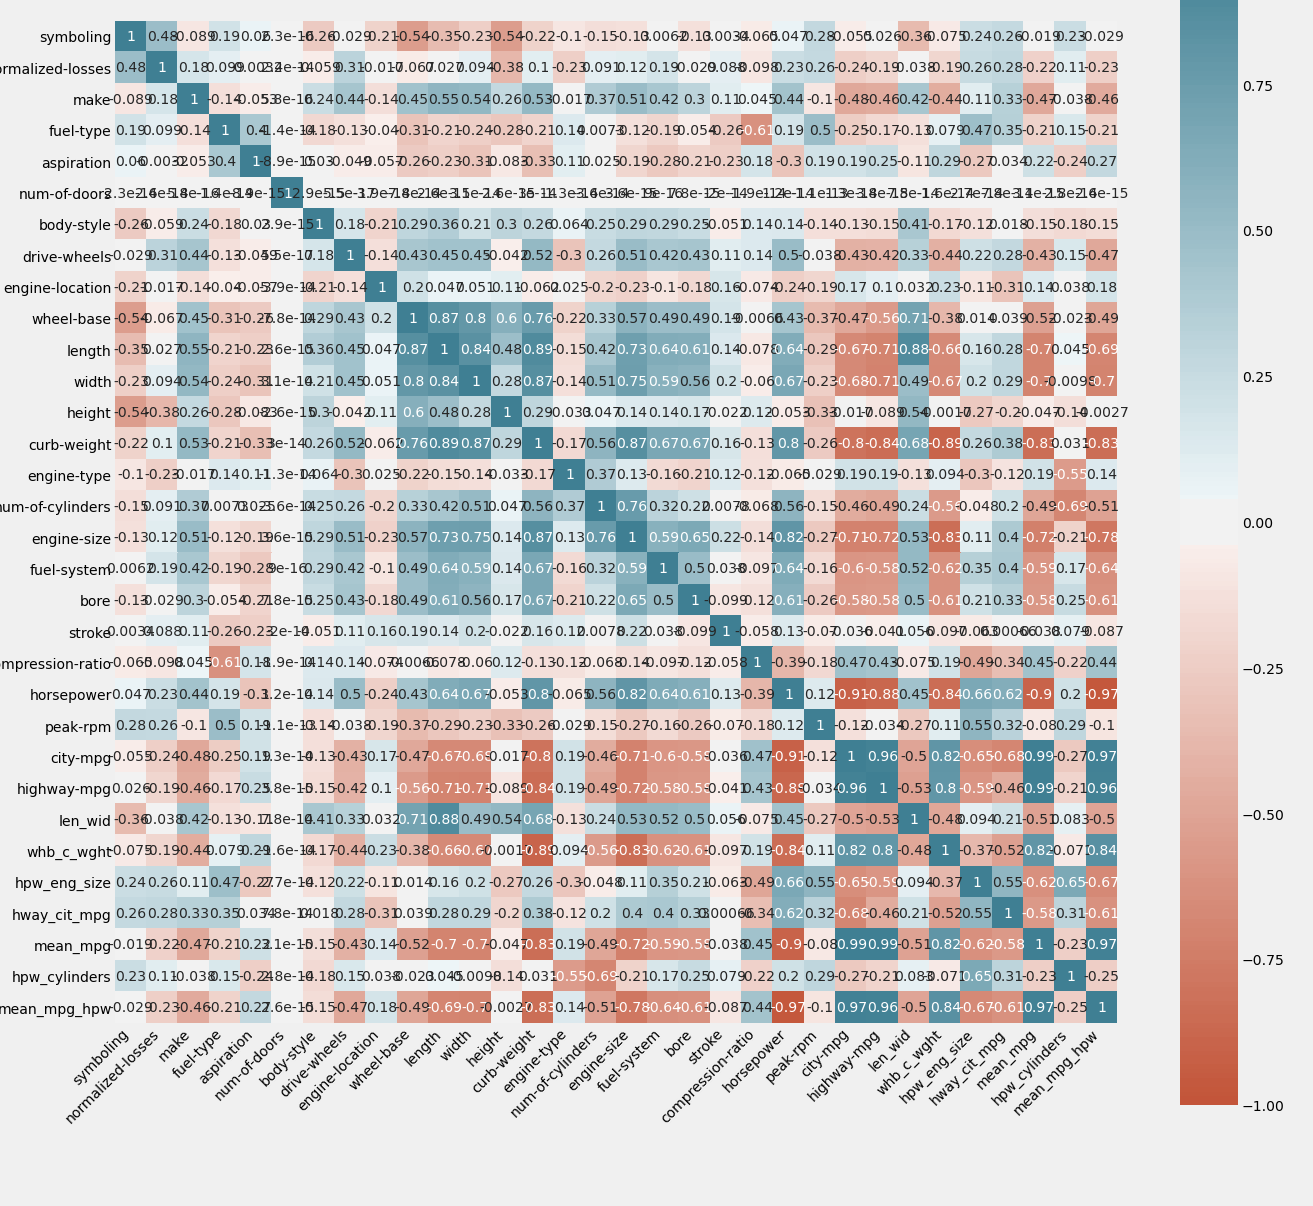

In [63]:
# Numerical variables correlation
cars_noprice = cars.drop('price',axis=1) # removing price column

corr = cars_noprice.corr() # creting the correlation matrix

plt.figure(figsize=(20,20)) # creating the and difyning figure size
ax = sns.heatmap( # plotting correlation matrix
    corr,vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [64]:
# creating the correlation matrix
corr_matrix = cars_noprice.corr().abs()

# creating a mask to apply to our correlation matrix and filter high correlations
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

# replacing low correlations with NA's
tri_df = corr_matrix.mask(mask)

# selecting features to dropp that have correlation with each other above 0.80
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.8)]

# dropping high correlated features
cars = cars.drop(to_drop,axis=1)

In [65]:
price = cars['price'] #saving prices
cars = cars.drop('price',axis=1) # dropping prices from cars dataset
cars['price'] = price # joing prices into our dataset again

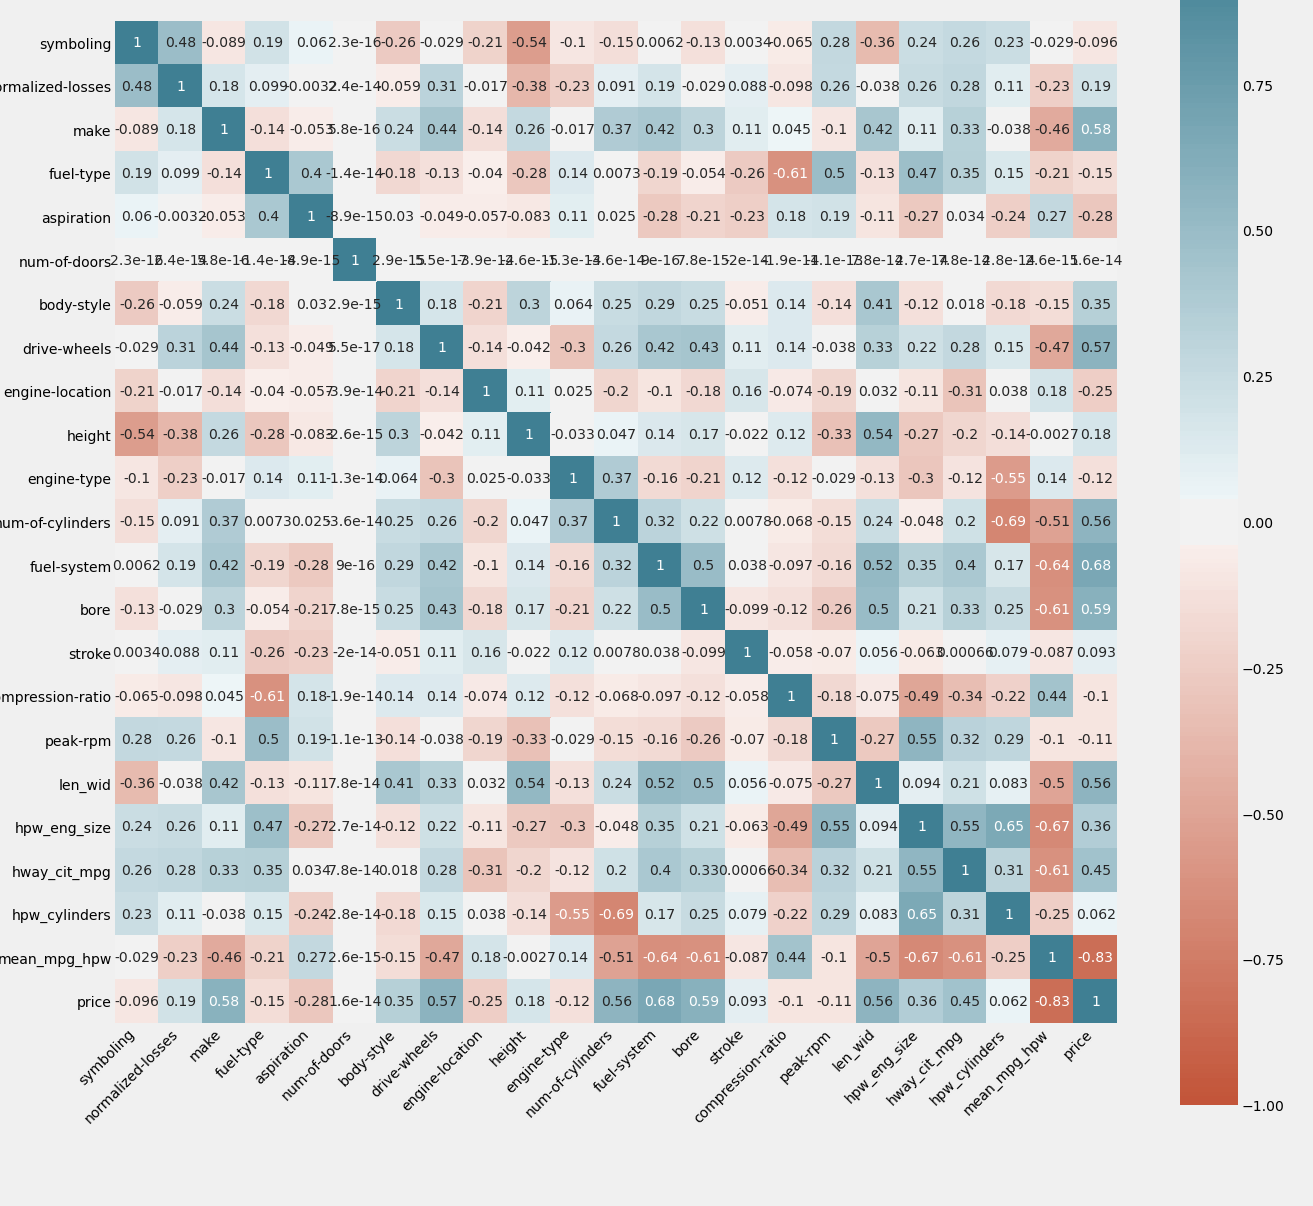

In [67]:
# Numerical variables correlation
corr = cars.corr() # creting the correlation matrix

plt.figure(figsize=(20,20)) # creating the and difyning figure size
ax = sns.heatmap( # plotting correlation matrix
    corr,vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [68]:
# splitting the data with our target into y1 and the rest of data into x1
x1 = cars.drop('price', axis=1)
y1 = cars['price']

In [72]:
from sklearn.model_selection import train_test_split
# splitting our dataset into train and target
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.7,random_state=42) # 70% train and 30% test

In [75]:
# training the model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train1, y_train1)

LinearRegression()

In [76]:
# predicting on train dataset
y_pred_train1 = regression.predict(x_train1)
y_pred_train1 = np.exp(y_pred_train1)

In [77]:
# predicting on test dataset
y_pred_test1 = regression.predict(x_test1)
y_pred_test1 = np.exp(y_pred_test1)

In [78]:
# removing log transformation from our target
y_train1_exped = np.exp(y_train1)
y_test1_exped = np.exp(y_test1)

In [80]:
from sklearn import metrics
# model quality metrics in train dataset prediction
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train1_exped, y_pred_train1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train1_exped, y_pred_train1)))

Mean Absolute Error: 1577.2343688129351
Root Mean Squared Error: 2170.2138627196596


In [81]:
# model quality metrics in test dataset prediction
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1_exped, y_pred_test1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1_exped, y_pred_test1)))

Mean Absolute Error: 1919.6670882591998
Root Mean Squared Error: 2776.4360103356685
